1.MSSV: 19522351

2.Họ tên: Trần Trung Tín

3.Bài tập: 2

#Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
dir_monhoc = '/content/drive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

#Khai báo thư viện

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.spatial import distance

#Yêu cầu 1

##Viết hàm

In [ ]:
def sobel_filters(img):
  Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.int64)
  Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.int64)
  #Ix = ndimage.filters.convolve(img, Kx)
  Ix = cv.filter2D(img, -1, Kx)
  #Iy = ndimage.filters.convolve(img, Ky)
  Iy = cv.filter2D(img, -1, Ky)
  G = np.hypot(Ix, Iy)
  G = G / G.max() * 255
  theta = np.arctan2(Iy, Ix)
  return Ix, Iy, G.astype(np.float64), theta

##Đọc ảnh

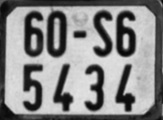

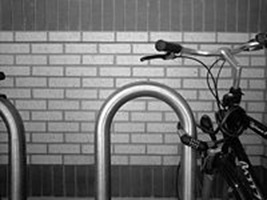

In [ ]:
path_Bicycle = os.path.join(dir_images, 'Bicycle.jpg')
path_bansoxe = os.path.join(dir_images, 'bansoxejpg.jpg')
img_Bicycle = cv.imread(path_Bicycle, 0)
img_bansoxe = cv.imread(path_bansoxe, 0)
cv2_imshow(img_bansoxe)
cv2_imshow(img_Bicycle)

##Hiện thị ảnh

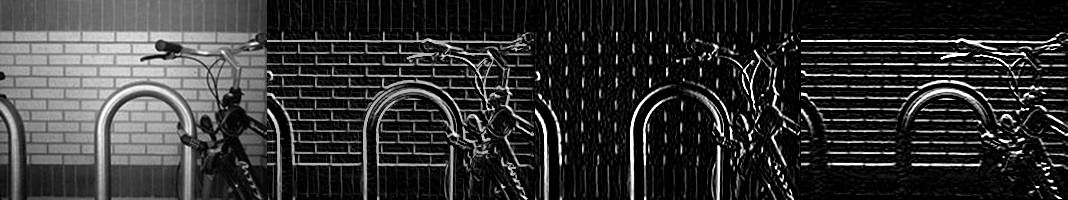

In [ ]:
Ix1, Iy1, G1, theta1 = sobel_filters(img_Bicycle)
hstack_Bicycle = np.hstack((img_Bicycle, G1, Ix1, Iy1))
cv2_imshow(hstack_Bicycle)

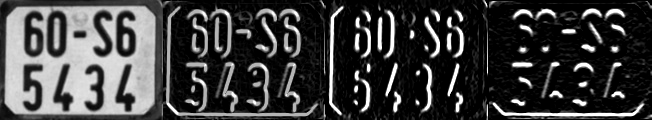

In [ ]:
Ix2, Iy2, G2, thetan2 = sobel_filters(img_bansoxe)
hstack_bansoxe = np.hstack((img_bansoxe, G2, Ix2, Iy2))
cv2_imshow(hstack_bansoxe)

#Yêu cầu 2: Xác định đặc trưng ảnh, tính khoảng cách và xác định độ tương đồng

In [ ]:
path_0814 = os.path.join(dir_images, 'image_0814.jpg')
path_0816 = os.path.join(dir_images, 'image_0816.jpg')
path_1248 = os.path.join(dir_images, 'image_1248.jpg')
img_0814 = cv.imread(path_0814, 0)
img_0816 = cv.imread(path_0816, 0)
img_1248 = cv.imread(path_1248, 0)

In [ ]:
def calFeatureVector(img):
  img_ = cv.resize(img, (256, 256))
  _, _, G, _ = sobel_filters(img_)
  row_sum = np.sum(G, axis=1, dtype=np.float64)
  col_sum = np.sum(G, axis=0, dtype=np.float64)
  return (np.hstack((row_sum.T, col_sum)))

##So sánh 2 ảnh 0814 và 0816

In [ ]:
feat_0814 = calFeatureVector(img_0814)
feat_0816 = calFeatureVector(img_0816)
distance_0814_0816 = distance.euclidean(feat_0814, feat_0816)

In [ ]:
print(f'Khoảng cách giữa 2 ảnh 0814 và 0816 là: {distance_0814_0816}')
print(f'Độ tương đồng theo cosin giữa 2 ảnh 0814 và 0816 là: {1-distance.cosine(feat_0814, feat_0816)}')

Khoảng cách giữa 2 ảnh 0814 và 0816 là: 55432.88078311733
Độ tương đồng theo cosin giữa 2 ảnh 0814 và 0816 là: 0.9403013260778476


##So sánh 2 ảnh 0814 và 1248

In [ ]:
feat_1248 = calFeatureVector(img_1248)
distance_0814_1248 = distance.euclidean(feat_0814, feat_1248)

In [ ]:
print(f'Khoảng cách giữa 2 ảnh 0814 và 1248 là {distance_0814_1248}')
print(f'Độ tương đồng theo cosin giữa 2 ảnh 0814 và 1248 là: {1-distance.cosine(feat_0814, feat_1248)}')

Khoảng cách giữa 2 ảnh 0814 và 1248 là 92123.37554385341
Độ tương đồng theo cosin giữa 2 ảnh 0814 và 1248 là: 0.8133452847890963
